PART ONE

In [2]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


Import all required libraries

In [113]:
from matplotlib import pyplot as plt
import seaborn as sns
from glob import glob 

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
import cv2

import numpy as np 
import pandas as pd


from keras import layers
from keras import models
from keras import optimizers

from keras.preprocessing.image import img_to_array, load_img
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D,GlobalMaxPool2D
from keras.layers. normalization import BatchNormalization
from keras.optimizers import Adam

In [49]:
import os
import cv2

X_train_base = []
y_train_base = []

# list all folders inside train directory
for i in os.listdir('./drive/MyDrive/CNN_Project2/17flowers/jpg/'):
    print(i)          
    for j in os.listdir('./drive/MyDrive/CNN_Project2/17flowers/jpg/' + i):
      # read each image inside train directory one by one
      dummy = cv2.imread('./drive/MyDrive/CNN_Project2/17flowers/jpg/' + i + "/" + j)
      dummy = cv2.resize(dummy, (128, 128))
      X_train_base.append(dummy)
      y_train_base.append(i)

10
14
2
1
13
12
16
11
0
15
5
4
7
9
6
3
8


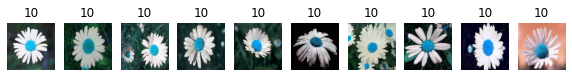

In [50]:
# visualizing the first 10 images in the dataset and their labels

# VISUALIZATION
import matplotlib.pyplot as plt # MATPLOTLIB FOR PLOTTING
import seaborn as sns

N=10  # NUMBER OF IMAGES YOU WISH TO SEE

plt.figure(figsize=(N, 1))
for i in range(N):
    plt.subplot(1, N, i+1)
    plt.imshow(X_train_base[i], cmap="gray")  # greens, reds, blues, rgb
    plt.title("{}".format(y_train_base[i]))
    plt.axis('off')
plt.show()

In [90]:
#Applying different Augmentations

Lets take one sample image

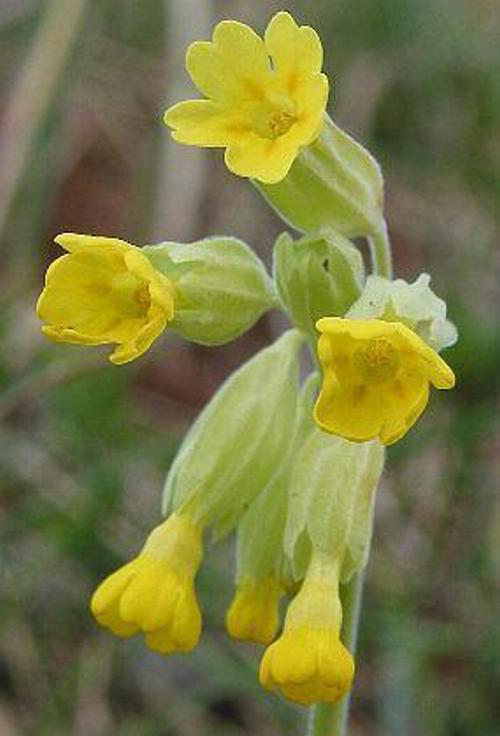

In [71]:
#Load an image using Keras image class
image_file = '/content/drive/MyDrive/CNN_Project2/17flowers/jpg/13/image_1041.jpg'
flower_image = tf.keras.preprocessing.image.load_img(image_file)
flower_array = tf.keras.preprocessing.image.img_to_array(flower_image)

#Inspect image
flower_image

In [72]:
def plot_images(original_image, updated_image):
    
    plt.figure(figsize=(15,8))
    #Original image
    plt.subplot(1,2,1)
    plt.title('Original image')
    plt.imshow(original_image)

    #Transformed image
    plt.subplot(1,2,2)
    plt.title('Transformed image')
    plt.imshow(updated_image)

    plt.show()

Horizontal Flipping

In [73]:
import tensorflow as tf
#Create a ImageDataGenerator by specifying the augmentation
transform_fn = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True)

In [74]:
#Feed numpy array to ImageDataGenerator to transfor
transformed_array = transform_fn.random_transform(flower_array)

#Convert array to image
transformed_image = tf.keras.preprocessing.image.array_to_img(transformed_array)

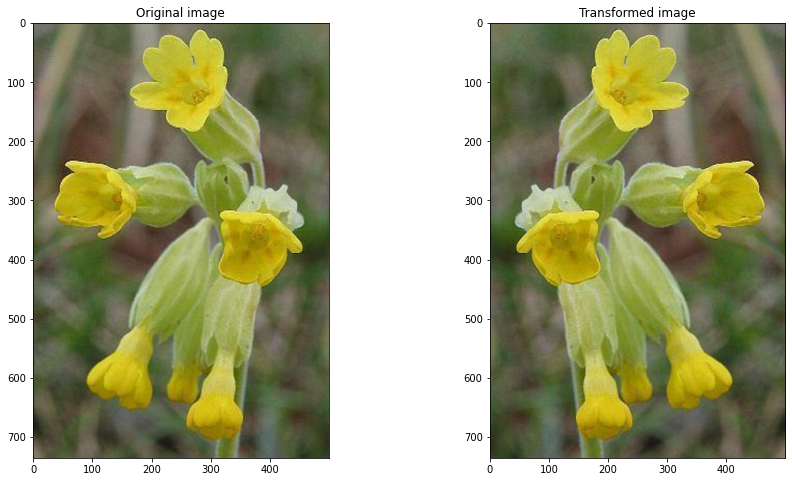

In [75]:
#Show both original and transormed image
plot_images(flower_image, transformed_image)

Zoom

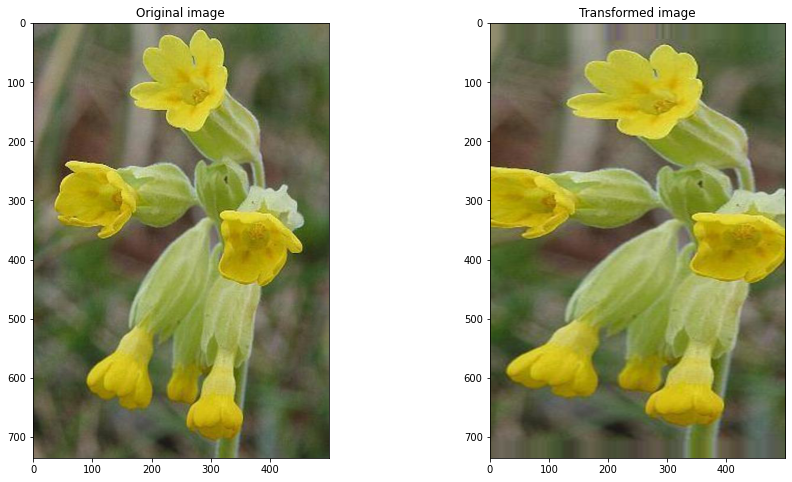

In [84]:
transform_fn = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range=[0.25, 1.6])
transformed_array = transform_fn.random_transform(flower_array)
transformed_image = tf.keras.preprocessing.image.array_to_img(transformed_array)

plot_images(flower_image, transformed_image)

Image Shifting

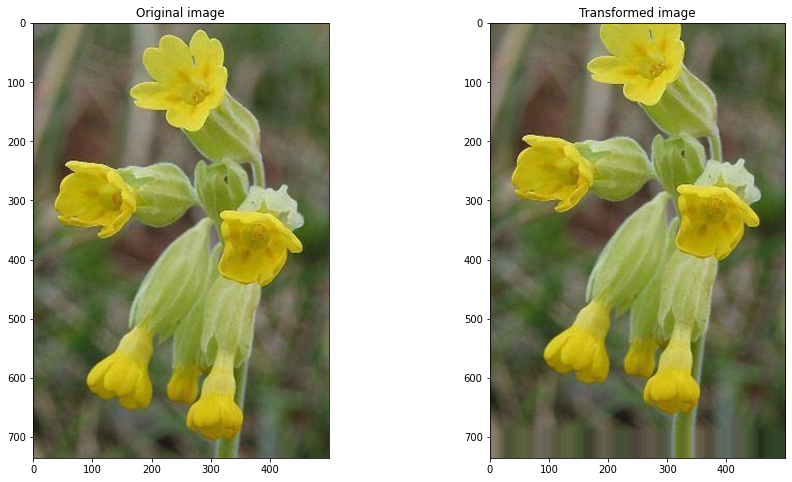

In [79]:
transform_fn = tf.keras.preprocessing.image.ImageDataGenerator(height_shift_range=200)
transformed_array = transform_fn.random_transform(flower_array)
transformed_image = tf.keras.preprocessing.image.array_to_img(transformed_array)

plot_images(flower_image, transformed_image)

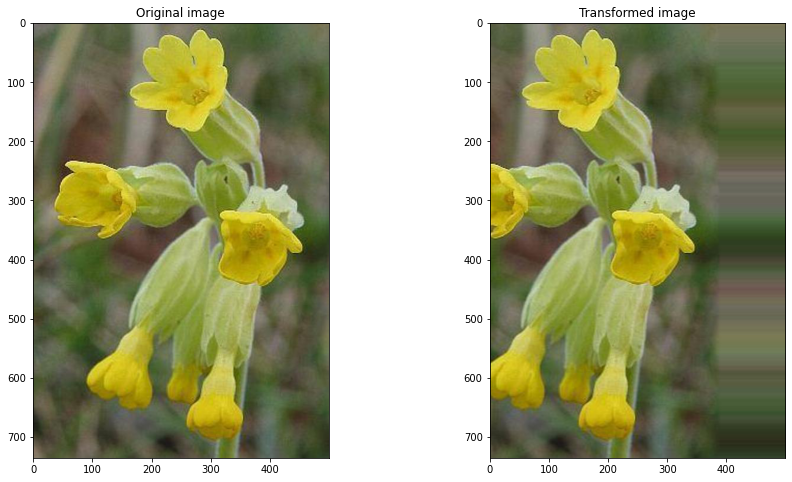

In [80]:
transform_fn = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.50)
transformed_array = transform_fn.random_transform(flower_array)
transformed_image = tf.keras.preprocessing.image.array_to_img(transformed_array)

plot_images(flower_image, transformed_image)

Image Rotation

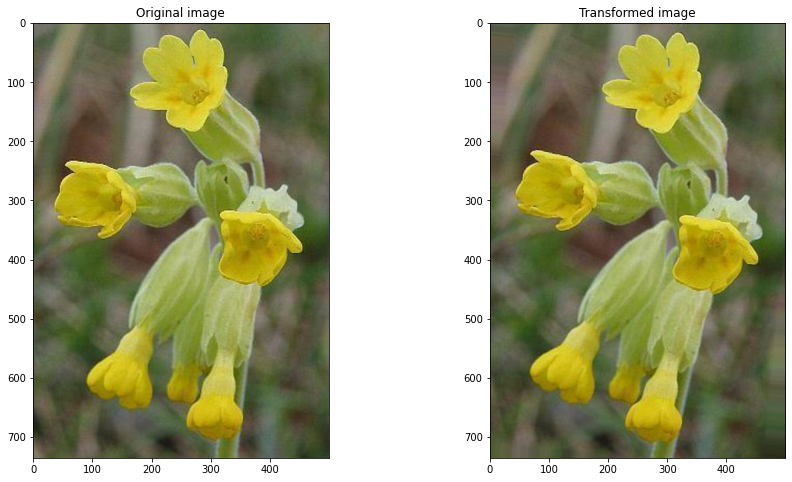

In [83]:
transform_fn = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20)
transformed_array = transform_fn.random_transform(flower_array)
transformed_image = tf.keras.preprocessing.image.array_to_img(transformed_array)

plot_images(flower_image, transformed_image)

Multiple transformations

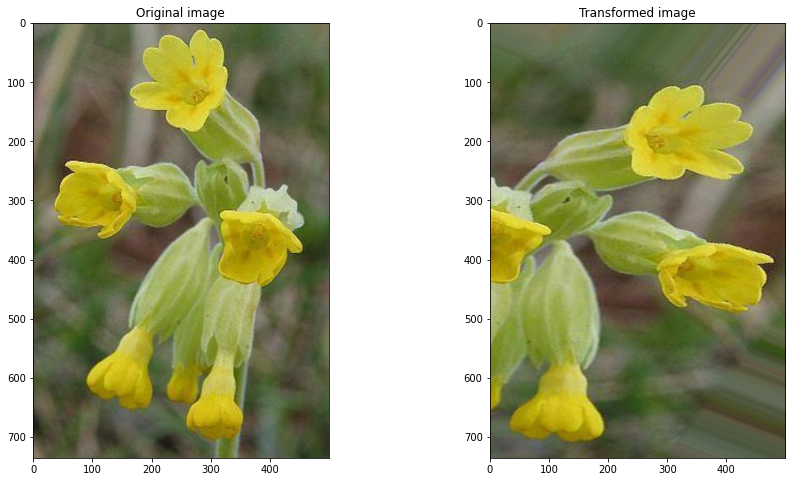

In [85]:
transform_fn = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True,
                                                               width_shift_range=0.2,
                                                               height_shift_range=0.2,
                                                               rotation_range=30,
                                                               shear_range=0.2,
                                                               zoom_range=0.3)
transformed_array = transform_fn.random_transform(flower_array)
transformed_image = tf.keras.preprocessing.image.array_to_img(transformed_array)

plot_images(flower_image, transformed_image)

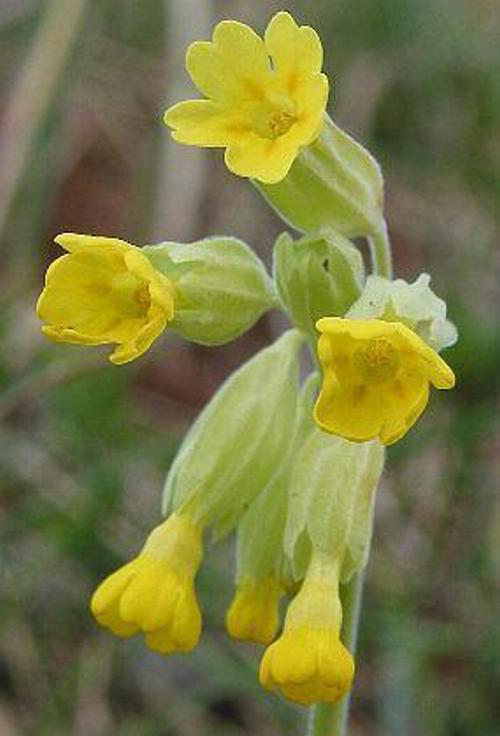

In [87]:
flower_image

Applying Filters

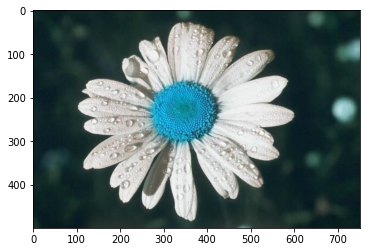

In [94]:
import cv2
img = cv2.imread('/content/drive/MyDrive/CNN_Project2/17flowers/jpg/10/image_0802.jpg', 1)
imgplot = plt.imshow(img)
plt.show()

with kernel size: 3


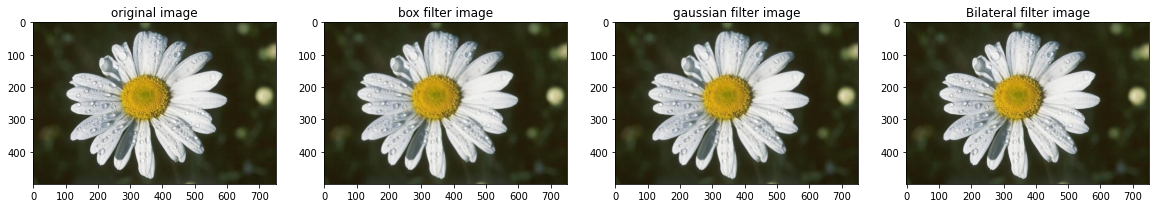

with kernel size: 11


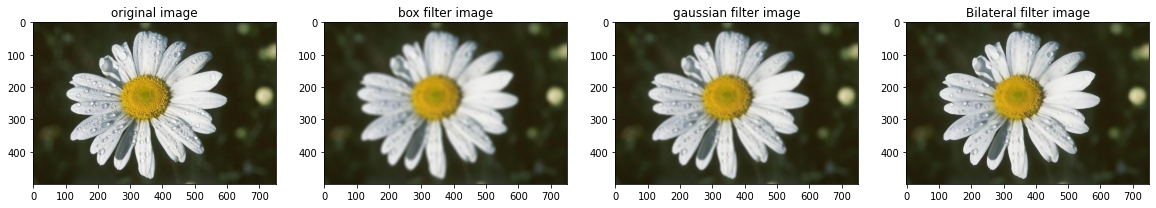

with kernel size: 19


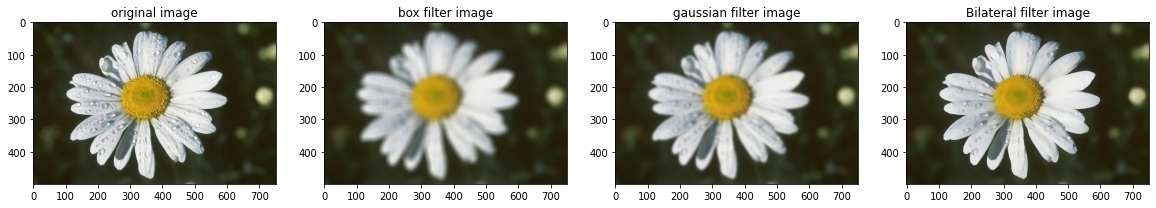

with kernel size: 27


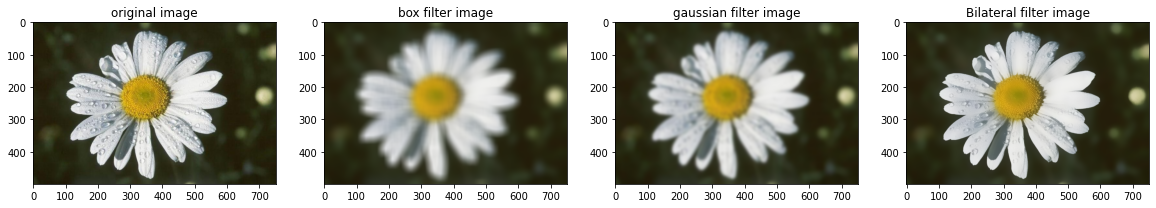

In [99]:
# Define a function for plotting multiple figures
def plot_img(images, titles):
  fig, axs = plt.subplots(nrows = 1, ncols = len(images),
                          figsize = (20, 20))
  for i, p in enumerate(images):
    axs[i].imshow(cv2.cvtColor(p, cv2.COLOR_BGR2RGB))
    axs[i].set_title(titles[i])
    #axs[i].axis('off')
  plt.show()
# To show a side by side comparison of different filters with different kernel sizes.
for i in range(3,30,8):
  print("with kernel size: "+str(i))
  a_img = cv2.blur(img,(i,i))
  g_img = cv2.GaussianBlur(img,(i,i),0)
  b_img = cv2.bilateralFilter(img,i,75,75)
  images=[img, a_img, g_img, b_img]
  titles=['original image',
          'box filter image',
          'gaussian filter image',
          'Bilateral filter image']
  plot_img(images, titles)

In [97]:
# Blur the image ---- define a function for box filter
def box_kernel(size):
  k = np.ones((size,size),np.float32)/(size**2.5)
  return k
# Basically, the smallest the kernel, the less visible is the blur. In our example, we will use a 5 by 5 kernel.
size=5
box_filter_img = cv2.filter2D(img,-1,box_kernel(size))

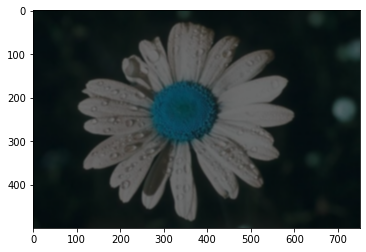

In [98]:
imgplot = plt.imshow(box_filter_img)
plt.show()

Embossing

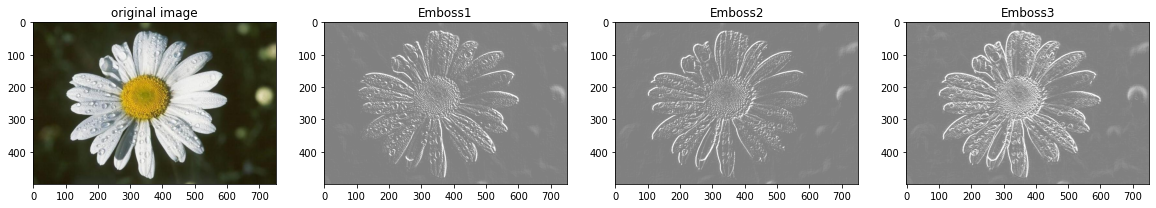

In [104]:
height, width = img.shape[:2]
y = np.ones((height, width), np.uint8) * 128
output = np.zeros((height, width), np.uint8)
# generating the kernels
kernel1 = np.array([[0, -1, -1], # kernel for embossing bottom left side
                    [1, 0, -1],
                    [1, 1, 0]])
kernel2 = np.array([[-1, -1, 0], # kernel for embossing bottom right side
                    [-1, 0, 1],
                    [0, 1, 1]])
# you can generate kernels for embossing top as well
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
output1 = cv2.add(cv2.filter2D(gray, -1, kernel1), y) # emboss on bottom left side
output2 = cv2.add(cv2.filter2D(gray, -1, kernel2), y) # emboss on bottom right side
for i in range(height):
    for j in range(width):
        output[i, j] = max(output1[i, j], output2[i, j]) # combining both embosses to produce stronger emboss

images=[img, output1, output2, output]
titles=['original image',
          'Emboss1',
          'Emboss2',
          'Emboss3']
plot_img(images, titles)

Contour

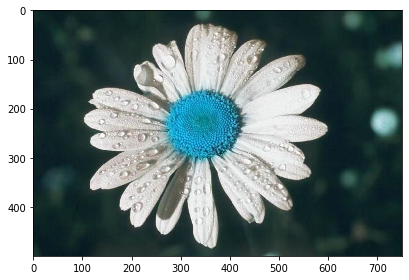

In [110]:
from skimage.io import imread, imshow
from skimage import data

imshow(img)

from skimage import measure

skimage.measure.find_contours(img, 0.5)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import measure


# Construct some test data
x, y = np.ogrid[-np.pi:np.pi:100j, -np.pi:np.pi:100j]
r = np.sin(np.exp((np.sin(x)**3 + np.cos(y)**2)))

# Find contours at a constant value of 0.8
contours = measure.find_contours(r, 0.8)

# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

------ Data Contains----------
80 data for - 0 category
80 data for - 1 category
80 data for - 2 category
80 data for - 3 category
80 data for - 4 category
80 data for - 5 category
80 data for - 6 category
80 data for - 7 category
80 data for - 8 category
80 data for - 9 category
80 data for - 10 category
88 data for - 11 category
82 data for - 12 category
85 data for - 13 category
80 data for - 14 category
80 data for - 15 category


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


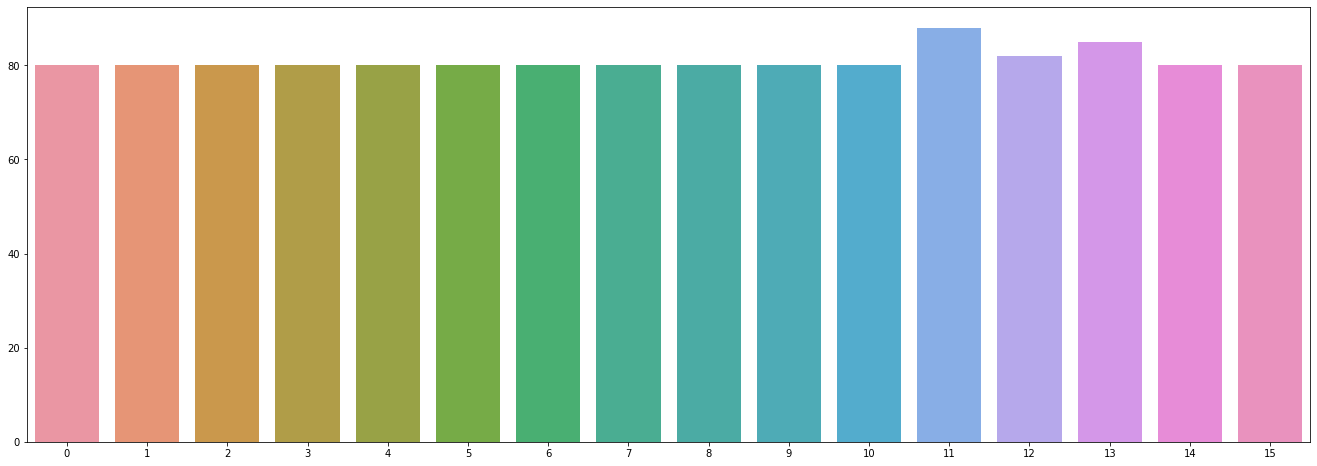

In [10]:
category = ['0', '1', '2', '3','4', '5', '6', '7','8', '9', '10','11','12','13','14','15']
print_data = {}

print('------ Data Contains----------')

for s in category:
    count= len(os.listdir(os.path.join('./drive/MyDrive/CNN_Project2/17flowers/jpg/',s )))
    print('{} data for - {} category'.format(count,s))
    print_data[s] = count
    
plt.figure(figsize=(23, 8))  
sns.barplot(list(print_data.keys()), list(print_data.values()))

2. Train tune and test AIML image classifier model using:
- Use supervised learning algorithms for training
- Use neural networks for training
- Use CNN for training

Supervised Learning

In [11]:
from sklearn.model_selection import train_test_split

X_train_ML, X_val_ML, y_train_ML, y_val_ML = train_test_split(X_train_base, y_train_base, test_size=0.2, random_state=2)

print(len(X_train_ML))
print(len(X_val_ML))

1100
275


In [12]:
X_train = np.array(X_train_ML)
X_train.shape

(1100, 128, 128, 3)

In [13]:
X_test = np.array(X_val_ML)
X_test.shape

(275, 128, 128, 3)

In [14]:
X_train[0]

array([[[109, 116, 107],
        [110, 118, 116],
        [119, 131, 137],
        ...,
        [ 77,  97,  94],
        [106, 124, 126],
        [122, 140, 143]],

       [[120, 132, 123],
        [130, 145, 144],
        [149, 167, 172],
        ...,
        [ 64,  90,  89],
        [148, 171, 175],
        [177, 200, 204]],

       [[104, 125, 117],
        [113, 137, 136],
        [128, 156, 162],
        ...,
        [ 69, 105, 104],
        [160, 190, 195],
        [168, 197, 202]],

       ...,

       [[ 68,  80,  53],
        [ 53,  71,  32],
        [ 58,  84,  32],
        ...,
        [ 33,  68,  22],
        [ 38,  69,  27],
        [ 57,  82,  54]],

       [[ 67,  76,  55],
        [ 51,  67,  34],
        [ 51,  75,  28],
        ...,
        [ 26,  60,  18],
        [ 26,  56,  17],
        [ 63,  88,  61]],

       [[ 82,  87,  72],
        [ 78,  89,  62],
        [ 74,  91,  53],
        ...,
        [ 54,  86,  51],
        [ 58,  87,  52],
        [ 68,  93,  67]]

In [15]:
X_test[0]

array([[[ 13,  44,  18],
        [ 12,  41,  16],
        [ 15,  41,  18],
        ...,
        [ 32,  33,  33],
        [ 30,  33,  30],
        [ 30,  35,  30]],

       [[ 60,  76,  68],
        [ 36,  56,  44],
        [ 18,  42,  23],
        ...,
        [ 33,  36,  34],
        [ 26,  29,  28],
        [ 29,  30,  29]],

       [[ 75,  81,  81],
        [ 72,  85,  78],
        [ 78,  97,  83],
        ...,
        [ 24,  30,  26],
        [ 26,  31,  32],
        [ 28,  28,  29]],

       ...,

       [[ 43,  51,  28],
        [ 47,  59,  37],
        [ 17,  31,  13],
        ...,
        [119, 113, 118],
        [118, 109, 112],
        [104,  96,  97]],

       [[ 49,  53,  31],
        [ 45,  56,  33],
        [ 30,  46,  22],
        ...,
        [113, 113, 119],
        [117, 115, 118],
        [ 86,  83,  83]],

       [[ 48,  56,  32],
        [ 41,  50,  29],
        [ 51,  63,  43],
        ...,
        [ 82,  85,  89],
        [ 69,  67,  72],
        [ 21,  18,  20]]

In [16]:
train_X = X_train.astype('float32')
train_X = X_train.reshape(X_train.shape[0],128,128,3)
train_X = X_train / 255.

test_X = X_test.astype('float32')
test_X = X_test.reshape(X_test.shape[0], 128,128,3)
test_X = X_test / 255.

print('\nTraining data : ', train_X.shape)  # TRAIN

print('\nTesting data : ', test_X.shape) # TEST


Training data :  (1100, 128, 128, 3)

Testing data :  (275, 128, 128, 3)


In [17]:
# Flatten the images data 

# Training data
x_train = []
for i in range(1100):
    x_train.append(train_X[i,:].flatten())

# Testing data
x_test = []
for i in range(275):
    x_test.append(test_X[i,:].flatten())

train_Y=y_train_ML[0:1100]
test_Y=y_val_ML[0:275]

# Print data lengths

print("\n Training data:",len(x_train))
print("\n Training Target data:",len(train_Y))
print("\n Testing data:",len(x_test))
print("\n Testing Target data:",len(test_Y))


 Training data: 1100

 Training Target data: 1100

 Testing data: 275

 Testing Target data: 275


In [18]:
# Logistic Regression

from sklearn. linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier


LogR = LogisticRegression()
LogR.fit(x_train, train_Y)

y_pred=LogR.predict(x_train)
LogR_Accuracy_Train = accuracy_score(y_true=train_Y, y_pred=y_pred)
print("Train Accuracy : ", LogR_Accuracy_Train)

y_pred = LogR.predict(x_test)
LogR_Accuracy_Test = accuracy_score(y_true=test_Y, y_pred=y_pred)
print("Test Accuracy : ", LogR_Accuracy_Test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train Accuracy :  1.0
Test Accuracy :  0.4290909090909091


In [19]:
# NB - Model

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

NB = GaussianNB()
NB.fit(x_train, train_Y)

y_pred = NB.predict(x_train)
NB_Accuracy_Train=accuracy_score(train_Y, y_pred, normalize = True)
print("Train Accuracy: ", NB_Accuracy_Train)

y_pred = NB.predict(x_test)
NB_Accuracy_Test=accuracy_score(test_Y, y_pred, normalize = True)
print("Test Accuracy : ", NB_Accuracy_Test)

Train Accuracy:  0.5290909090909091
Test Accuracy :  0.3890909090909091


In [20]:
# SVM - Model
from sklearn.svm import SVC
SVM = SVC(C=0.9,kernel='linear')
SVM.fit(x_train, train_Y)

SVM_Accuracy=SVM.score(x_train, train_Y)
print("Train Accuracy : ", SVM_Accuracy)

SVM_Accuracy=SVM.score(x_test, test_Y)
print("Test Accuracy : ", SVM_Accuracy)

Train Accuracy :  1.0
Test Accuracy :  0.4581818181818182


In [21]:
# KNN - Model

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

KNN = KNeighborsClassifier(n_neighbors=19)
KNN.fit(x_train, train_Y)

y_pred = KNN.predict(x_train)
KNN_Accuracy_Train=accuracy_score(train_Y, y_pred)
print("Train Accuracy : ", KNN_Accuracy_Train)

y_pred = KNN.predict(x_test)
KNN_Accuracy_Test=accuracy_score(test_Y, y_pred)
print("Test Accuracy : ", KNN_Accuracy_Test)

Train Accuracy :  0.4036363636363636
Test Accuracy :  0.27636363636363637


In [22]:
# Decision Tree

# Library
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix

# Model
model_DT=DecisionTreeClassifier(criterion='entropy',
                                splitter='best',
                                max_depth=5,
                                min_samples_split=2,
                                min_samples_leaf=1,
                                min_weight_fraction_leaf=0.0,
                                max_features=None,
                                random_state=None,
                                max_leaf_nodes=None,
                                min_impurity_decrease=0.0,
                                min_impurity_split=None,
                                class_weight=None,
                                presort='deprecated',
                                ccp_alpha=0.0,)

model_DT.fit(x_train, train_Y)

# Accuracy
DT_Train=model_DT.score(x_train, train_Y)
DT_Test=model_DT.score(x_test, test_Y)

# Output
print("Train Accuracy:",DT_Train)
print("Test Accuracy:",DT_Test)

Train Accuracy: 0.41454545454545455
Test Accuracy: 0.19636363636363635


In [ ]:
# RANDOM FOREST

# Library
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Model
model_RF = RandomForestClassifier(n_estimators=100,
                                    criterion='entropy',
                                    max_depth=None,
                                    min_samples_split=2,
                                    min_samples_leaf=1,
                                    min_weight_fraction_leaf=0.0,
                                    max_features='auto',
                                    max_leaf_nodes=None,
                                    min_impurity_decrease=0.0,
                                    min_impurity_split=None,
                                    bootstrap=True,
                                    oob_score=False,
                                    n_jobs=None,
                                    random_state=None,
                                    verbose=0,
                                    warm_start=False,
                                    class_weight=None,
                                    ccp_alpha=0.0,
                                    max_samples=None,)
model_RF.fit(x_train, train_Y)

# Accuracy
pred_RF = model_RF.predict(x_test)
RF_Train = model_RF.score(x_train, train_Y)
RF_Test = accuracy_score(test_Y, pred_RF)   

# Output
print("Train Accuracy:",RF_Train)
print("Test Accuracy:",RF_Test)

Train Accuracy: 1.0
Test Accuracy: 0.44


In [ ]:
# ADA Boosting

# Library
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# Model
model = AdaBoostClassifier( base_estimator=None,    # SVC(), RandomForestClassifier(), GradientBoostingClassifier()
                            n_estimators=10,
                            learning_rate=1.0,
                            algorithm='SAMME.R',     # try using SVC() as base estimator above
                            random_state=None,)
model_AB = model.fit(x_train, train_Y)

# Accuracy
AB_Train = model_AB.score(x_train, train_Y)
pred_AB =model_AB.predict(x_test)
acc_AB = accuracy_score(test_Y, pred_AB)

print("Train Accuracy:",AB_Train)
print("Test Accuracy:",acc_AB)

Train Accuracy: 0.18181818181818182
Test Accuracy: 0.12363636363636364


In [ ]:
# GRADIENT BOOSTING


# Library
from sklearn.ensemble import GradientBoostingClassifier

# Model
model = GradientBoostingClassifier(loss='deviance',
                                    learning_rate=0.1,
                                    n_estimators=10,
                                    subsample=1.0,
                                    criterion='friedman_mse',
                                    min_samples_split=2,
                                    min_samples_leaf=1,
                                    min_weight_fraction_leaf=0.0,
                                    max_depth=3,
                                    min_impurity_decrease=0.0,
                                    min_impurity_split=None,
                                    init=None,
                                    random_state=None,
                                    max_features=None,
                                    verbose=1,
                                    max_leaf_nodes=None,
                                    warm_start=False,
                                    presort='deprecated',
                                    validation_fraction=0.1,
                                    n_iter_no_change=None,
                                    tol=0.0001,
                                    ccp_alpha=0.0)
model_GB = model.fit(x_train, train_Y)

# Accuracy
GB_Train = model_GB.score(x_train, train_Y)
pred_GB =model_GB.predict(x_test)
acc_GB = accuracy_score(test_Y, pred_GB)

print("Training Accuracy:",GB_Train)
print("Testing Accuracy:",acc_GB)

      Iter       Train Loss   Remaining Time 
         1        2452.9534           39.46m
         2        2164.3961           33.69m
         3        1900.8581           28.57m
         4        1702.3571           24.14m
         5        1540.7113           19.92m
         6        1388.1769           15.85m
         7        1258.1829           11.85m
         8        1157.7715            7.89m
         9        1063.6606            3.93m
        10         981.2744            0.00s
Training Accuracy: 0.9690909090909091
Testing Accuracy: 0.29818181818181816


In [ ]:
# Comparison table

Comparison1 = pd.DataFrame({'Method':['Logistic Regression'], 'Train accuracy': LogR_Accuracy_Train, 
                           'Test accuracy': LogR_Accuracy_Test})
Comparison1 = Comparison1[['Method', 'Train accuracy', 'Test accuracy']]


Comparison2 = pd.DataFrame({'Method':['Naive Bayes Regression'], 'Train accuracy': NB_Accuracy_Train, 
                           'Test accuracy': NB_Accuracy_Test},)
Comparison2 = Comparison2[['Method', 'Train accuracy', 'Test accuracy']]


Comparison3 = pd.DataFrame({'Method':['KNN'], 'Train accuracy': KNN_Accuracy_Train, 
                           'Test accuracy': KNN_Accuracy_Test})
Comparison3 = Comparison3[['Method', 'Train accuracy', 'Test accuracy']]


Comparison4 = pd.DataFrame({'Method':['SVM'], 'Train accuracy': DT_Train, 
                           'Test accuracy': DT_Test})
Comparison4 = Comparison4[['Method', 'Train accuracy', 'Test accuracy']]


Comparison5 = pd.DataFrame({'Method':['Decision Tree'], 'Train accuracy': LogR_Accuracy_Train, 
                            'Test accuracy': LogR_Accuracy_Test})
Comparison5 = Comparison5[['Method', 'Train accuracy', 'Test accuracy']]



Comparison6 = pd.DataFrame({'Method':['Random Forest'], 'Train accuracy': RF_Train, 
                           'Test accuracy': RF_Test})
Comparison6 = Comparison6[['Method', 'Train accuracy', 'Test accuracy']]



Comparison7 = pd.DataFrame({'Method':['Gradient Boosting'], 'Train accuracy': GB_Train, 
                           'Test accuracy': acc_GB})
Comparison7 = Comparison7[['Method', 'Train accuracy', 'Test accuracy']]



Comparison8 = pd.DataFrame({'Method':['ADA Boosting'], 'Train accuracy': AB_Train, 
                           'Test accuracy': acc_AB})
Comparison8 = Comparison8[['Method', 'Train accuracy', 'Test accuracy']]

Comparison = pd.concat([Comparison1, Comparison2,Comparison3,Comparison4,Comparison5,Comparison6,
                        Comparison7,Comparison8])

Comparison

Method  Train accuracy  Test accuracy
0     Logistic Regression        1.000000       0.429091
0  Naive Bayes Regression        0.529091       0.389091
0                     KNN        0.403636       0.276364
0                     SVM        0.414545       0.196364
0           Decision Tree        1.000000       0.429091
0           Random Forest        1.000000       0.440000
0       Gradient Boosting        0.969091       0.298182
0            ADA Boosting        0.181818       0.123636

Out of the Supervised models, we see Random Forest performed slightly better compared to the other models with a test accuracy of 44%

**Neural Networks**

In [ ]:
X_train_NN = np.array(X_train_ML)
X_train_NN.shape

(1100, 128, 128, 3)

In [ ]:
X_test_NN = np.array(X_val_ML)
X_test_NN.shape

(275, 128, 128, 3)

In [ ]:
X_train_NN = X_train_NN.astype('float32')
X_train_NN = X_train_NN.reshape(X_train.shape[0], 49152) # 49152 = 128 * 128 * 3
X_train_NN = X_train_NN / 255.

X_test_NN = X_test_NN.astype('float32')
X_test_NN = X_test_NN.reshape(X_test.shape[0], 49152)
X_test_NN = X_test_NN / 255.

print('\nTraining data : ', X_train_NN.shape)  # TRAIN

print('\nTesting data : ', X_test_NN.shape) # TEST


Training data :  (1100, 49152)

Testing data :  (275, 49152)


In [ ]:
from keras.utils import np_utils
import pandas as pd
# one hot encode outputs
y_train = pd.get_dummies(y_train_ML)
y_test = pd.get_dummies(y_val_ML)

# no.of classes
num_classes = y_test.shape[1]
num_hidden = 10

In [ ]:
from sklearn.preprocessing import StandardScaler

X_train_NN = StandardScaler().fit_transform(X_train_NN)   # Scale train data
X_test_NN = StandardScaler().fit_transform(X_test_NN)     # Scale test data

In [ ]:
print(X_train_NN.shape)
print(y_train.shape)
print(X_test_NN.shape)
print(y_test.shape)

(1100, 49152)
(1100, 17)
(275, 49152)
(275, 17)


In [ ]:
### define model
import keras
from keras import losses
from keras import optimizers
from keras.layers import Dropout, MaxPooling2D
from keras.layers import BatchNormalization
from keras.models import Sequential
from keras.layers import Dense, Activation

model_NN = Sequential()
#model_NN.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32)))
model_NN.add(BatchNormalization())
model_NN.add(Flatten())
#Dense layer
#adding 1 st dense layer
model_NN.add(Dense(256, activation='relu'))
model_NN.add(BatchNormalization())
model_NN.add(Dropout(0.5))
model_NN.add(Dense(64, activation='relu'))
model_NN.add(Dense(64, activation='relu'))

#adding 2 nd dense layer
model_NN.add(Dense(32, activation='relu'))
model_NN.add(BatchNormalization())
model_NN.add(Dropout(0.5))

#adding dense layer with same output as no of cateogries, in our case 17 category with softmax function
model_NN.add(Dense(num_classes, activation='softmax'))

# Compile model
adam = optimizers.Adam(lr=1e-3)
model_NN.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy']) ### Loss function = Categorical cross entropy

# Fit the model
model_NN.fit(X_train_NN, y_train, validation_data=(X_test_NN, y_test), epochs=10, batch_size=30, verbose=1)

Epoch 1/10
37/37 [==============================] - 8s 171ms/step - loss: 3.5862 - accuracy: 0.0789 - val_loss: 3.2431 - val_accuracy: 0.1055
Epoch 2/10
37/37 [==============================] - 6s 162ms/step - loss: 3.0755 - accuracy: 0.1283 - val_loss: 2.4638 - val_accuracy: 0.2218
Epoch 3/10
37/37 [==============================] - 6s 162ms/step - loss: 2.7446 - accuracy: 0.1736 - val_loss: 2.3569 - val_accuracy: 0.2364
Epoch 4/10
37/37 [==============================] - 6s 160ms/step - loss: 2.6339 - accuracy: 0.1936 - val_loss: 2.2866 - val_accuracy: 0.2655
Epoch 5/10
37/37 [==============================] - 6s 159ms/step - loss: 2.4330 - accuracy: 0.2265 - val_loss: 2.1928 - val_accuracy: 0.3345
Epoch 6/10
37/37 [==============================] - 6s 161ms/step - loss: 2.3351 - accuracy: 0.2570 - val_loss: 2.1079 - val_accuracy: 0.3564
Epoch 7/10
37/37 [==============================] - 6s 161ms/step - loss: 2.2504 - accuracy: 0.2766 - val_loss: 2.0017 - val_accuracy: 0.3527
Epoch 

In [ ]:
#Final score and accuracy of the model
score, acc = model_NN.evaluate(X_test_NN, y_test)
score1, acc1 = model_NN.evaluate(X_train_NN, y_train)
print('Test score:', score,'   Test accuracy:', acc)
print('Train score:', score1,'   Train accuracy:',acc1)

35/35 [==============================] - 1s 31ms/step - loss: 1.3637 - accuracy: 0.6445
Test score: 1.8761779069900513    Test accuracy: 0.4290909171104431
Train score: 1.3636635541915894    Train accuracy: 0.6445454359054565


We have got a test accuracy of 42.9% with Neural Networks

**CNN**

In [23]:
X_train_CNN = np.array(X_train_ML)
X_train_CNN.shape

(1100, 128, 128, 3)

In [24]:
X_test_CNN = np.array(X_val_ML)
X_test_CNN.shape

(275, 128, 128, 3)

In [25]:
y_train_CNN = pd.get_dummies(y_train_ML).values

In [26]:
y_test_CNN = pd.get_dummies(y_val_ML).values

In [27]:
print('\nTraining data : ', X_train_CNN.shape, y_train_CNN.shape)  # TRAIN


Training data :  (1100, 128, 128, 3) (1100, 17)


In [28]:
y_train_CNN[2]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [29]:
from tensorflow.keras.layers import Convolution2D, Dropout, Dense, Flatten, BatchNormalization, MaxPooling2D

model_CNN = Sequential()

model_CNN.add(BatchNormalization(input_shape = (128, 128, 3)))

model_CNN.add(Convolution2D(filters = 32, kernel_size = 3, activation ='relu', input_shape = (128, 128, 3))) 
model_CNN.add(MaxPooling2D(pool_size = 2))

model_CNN.add(Convolution2D(filters = 64, kernel_size = 4, padding = 'same', activation = 'relu'))
model_CNN.add(MaxPooling2D(pool_size = 2))

model_CNN.add(Convolution2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model_CNN.add(MaxPooling2D(pool_size = 2))

model_CNN.add(Convolution2D(filters = 128, kernel_size = 2, padding = 'same', activation = 'relu'))
model_CNN.add(MaxPooling2D(pool_size = 2))

model_CNN.add(Flatten()) 

# fully connected layer
model_CNN.add(Dense(units = 128,activation = 'relu'))
model_CNN.add(Dense(units = 64, activation = 'relu'))
model_CNN.add(Dense(units = 32, activation = 'relu'))

model_CNN.add(Dense(units = 17, activation = 'softmax')) 

In [30]:
optimizer = Adam(lr=0.0001)
model_CNN.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model_CNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 128, 128, 3)       12        
_________________________________________________________________
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 63, 63, 64)        32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 31, 31, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 128)       0

In [31]:
X_train_CNN.shape

(1100, 128, 128, 3)

In [32]:
data_generator = ImageDataGenerator(rotation_range=20,
                                    zoom_range=0.2,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    horizontal_flip=True,
                                    vertical_flip=True,
    )

In [33]:
data_generator.fit(X_train_CNN) 


In [34]:
#model_CNN.fit_generator(data_generator.flow(X_train_CNN,y_train_CNN,batch_size=16),epochs=20,
          validation_data=(X_test_CNN,y_test_CNN))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
69/69 [==============================] - 55s 787ms/step - loss: 2.7464 - accuracy: 0.1002 - val_loss: 2.6351 - val_accuracy: 0.1273
Epoch 2/20
69/69 [==============================] - 53s 768ms/step - loss: 2.3551 - accuracy: 0.1375 - val_loss: 2.0225 - val_accuracy: 0.2109
Epoch 3/20
69/69 [==============================] - 53s 772ms/step - loss: 2.1656 - accuracy: 0.2519 - val_loss: 1.8551 - val_accuracy: 0.3236
Epoch 4/20
69/69 [==============================] - 54s 789ms/step - loss: 1.9204 - accuracy: 0.3171 - val_loss: 1.9166 - val_accuracy: 0.3382
Epoch 5/20
69/69 [==============================] - 54s 780ms/step - loss: 1.8745 - accuracy: 0.3426 - val_loss: 1.8561 - val_accuracy: 0.3709
Epoch 6/20
69/69 [==============================] - 54s 779ms/step - loss: 1.7021 - accuracy: 0.4111 - val_loss: 1.6305 - val_accuracy: 0.4473
Epoch 7/20
69/69 [==============================] - 54s 779ms/step - loss: 1.6434 - accuracy: 0.4342 - val_loss: 1.5730 - val_accuracy: 0.5236

In [35]:
cnn_history = model_CNN.fit_generator(data_generator.flow(X_train_CNN,y_train_CNN,batch_size=16),epochs=20,
          validation_data=(X_test_CNN,y_test_CNN))

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


69/69 [==============================] - 54s 789ms/step - loss: 1.0048 - accuracy: 0.6509 - val_loss: 1.0807 - val_accuracy: 0.6436
Epoch 2/20
69/69 [==============================] - 55s 796ms/step - loss: 1.0479 - accuracy: 0.6409 - val_loss: 1.1388 - val_accuracy: 0.6327
Epoch 3/20
69/69 [==============================] - 54s 780ms/step - loss: 0.9834 - accuracy: 0.6691 - val_loss: 1.1289 - val_accuracy: 0.6255
Epoch 4/20
69/69 [==============================] - 55s 798ms/step - loss: 1.0093 - accuracy: 0.6427 - val_loss: 1.1084 - val_accuracy: 0.6473
Epoch 5/20
69/69 [==============================] - 54s 788ms/step - loss: 0.9163 - accuracy: 0.6864 - val_loss: 1.1254 - val_accuracy: 0.6691
Epoch 6/20
69/69 [==============================] - 55s 798ms/step - loss: 0.9455 - accuracy: 0.6791 - val_loss: 0.9461 - val_accuracy: 0.7055
Epoch 7/20
69/69 [==============================] - 54s 788ms/step - loss: 0.8772 - accuracy: 0.7200 - val_loss: 1.1236 - val_accuracy: 0.6655
Epoch 8/20

In [36]:
#Final score and accuracy of the model
score_cnn, acc_cnn = model_CNN.evaluate(X_test_CNN,y_test_CNN)
score1_cnn, acc1_cnn = model_CNN.evaluate(X_train_CNN,y_train_CNN)
print('Test score:', score_cnn,'   Test accuracy:', acc_cnn)
print('Train score:', score1_cnn,'   Train accuracy:',acc1_cnn)

35/35 [==============================] - 12s 339ms/step - loss: 0.4064 - accuracy: 0.8636
Test score: 0.8208180665969849    Test accuracy: 0.7672727108001709
Train score: 0.40643858909606934    Train accuracy: 0.8636363744735718


With CNN we see 71.6% testing accuracy which is far better than the supervised learning models or the neural networks

**Transfer Learning**

In [37]:
import tensorflow as tf
tf.keras.backend.clear_session()
model_xfr = tf.keras.applications.ResNet50(include_top=False, #Do not include classification layer for imagenet
                                       input_shape=(128,128,3),
                                       weights='imagenet')

94773248/94765736 [==============================] - 0s 0us/step


In [38]:
model_xfr.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [39]:
model_xfr.output

<KerasTensor: shape=(None, 4, 4, 2048) dtype=float32 (created by layer 'conv5_block3_out')>

Freezing the pre-trained model

In [40]:
len(model_xfr.layers)

175

In [41]:
#Set pre-trained model layers to not trainable
for layer in model_xfr.layers:
    layer.trainable = False

In [42]:
#Check if layers frozen
model_xfr.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

Add FC layer for new classes

In [43]:
model_xfr.output

<KerasTensor: shape=(None, 4, 4, 2048) dtype=float32 (created by layer 'conv5_block3_out')>

In [44]:
#get Output layer of Pre0trained model
x1 = model_xfr.output

#Global average pool to reduce number of features and Flatten the output
x2 = tf.keras.layers.GlobalAveragePooling2D()(x1)

In [45]:
#Output shape of Global Average Pooling
x2

<KerasTensor: shape=(None, 2048) dtype=float32 (created by layer 'global_average_pooling2d')>

In [46]:
#Add output layer
prediction = tf.keras.layers.Dense(17,activation='softmax')(x2)

In [47]:
prediction

<KerasTensor: shape=(None, 17) dtype=float32 (created by layer 'dense')>

In [48]:
#Using Keras Model class
final_model_xfr = tf.keras.models.Model(inputs=model_xfr.input, #Pre-trained model input as input layer
                                    outputs=prediction) #Output layer added

In [49]:
#Compile the model
final_model_xfr.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [50]:
final_model_xfr.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [51]:
#Saving the best model using model checkpoint callback
model_xfr_checkpoint=tf.keras.callbacks.ModelCheckpoint('flowers_resnet.h5', 
                                                    save_best_only=True, 
                                                    monitor='val_accuracy', 
                                                    mode='max', 
                                                    verbose=1)

model_CNN.fit_generator(data_generator.flow(X_train_CNN,y_train_CNN,batch_size=16),epochs=20,
          validation_data=(X_test_CNN,y_test_CNN))

In [52]:
final_model_xfr.fit(data_generator.flow(X_train_CNN,y_train_CNN,batch_size=16),
                epochs=5,
                steps_per_epoch= 2936//64,
                validation_data=(X_test_CNN,y_test_CNN),
                validation_steps = 734//64, 
                callbacks=[model_xfr_checkpoint])

Epoch 1/5
45/45 [==============================] - 59s 1s/step - loss: 2.7120 - accuracy: 0.2634 - val_loss: 0.9794 - val_accuracy: 0.6582

Epoch 00001: val_accuracy improved from -inf to 0.65818, saving model to flowers_resnet.h5
Epoch 2/5
45/45 [==============================] - 55s 1s/step - loss: 0.9204 - accuracy: 0.7115 - val_loss: 0.6830 - val_accuracy: 0.7564

Epoch 00002: val_accuracy improved from 0.65818 to 0.75636, saving model to flowers_resnet.h5
Epoch 3/5
45/45 [==============================] - 55s 1s/step - loss: 0.6405 - accuracy: 0.8125 - val_loss: 0.5632 - val_accuracy: 0.8145

Epoch 00003: val_accuracy improved from 0.75636 to 0.81455, saving model to flowers_resnet.h5
Epoch 4/5
45/45 [==============================] - 54s 1s/step - loss: 0.4681 - accuracy: 0.8578 - val_loss: 0.4772 - val_accuracy: 0.8473

Epoch 00004: val_accuracy improved from 0.81455 to 0.84727, saving model to flowers_resnet.h5
Epoch 5/5
45/45 [==============================] - 55s 1s/step - lo

 Unfreeze some of Trained Layers in ResNet

In [53]:
print(len(model_xfr.layers))

175


Let's unfreeze some layers at the end (which have high end features more specific to ImageNet)

In [54]:
for layer in model_xfr.layers[170:]:
    layer.trainable = True 

In [55]:
model_xfr.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [56]:
#We will need to recompile the model
final_model_xfr.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
final_model_xfr.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [57]:
#Lets train for 10 steps
history = final_model_xfr.fit(data_generator.flow(X_train_CNN,y_train_CNN,batch_size=32), 
                epochs=10,
                initial_epoch=5,
                steps_per_epoch= 2936//64,
                validation_data=(X_test_CNN,y_test_CNN),
                validation_steps = 734//64, 
                callbacks=[model_xfr_checkpoint])

Epoch 6/10
45/45 [==============================] - 79s 2s/step - loss: 0.5615 - accuracy: 0.8283 - val_loss: 0.9740 - val_accuracy: 0.7491

Epoch 00006: val_accuracy did not improve from 0.84727


In [58]:
final_model_xfr.save('flowers.h5')

In [59]:
import os
os.getcwd()

'/content'

We observe Supervised Learning is very poor in predicting image classifications. Decision trees and the Random Forest Classifier give us 42% and 44% respectively. With hyper parameter tuning this could be improved a little further but not beyond 50% or 60%

Neural Networks gave us a test accuracy of around 42% but neighbour information will be lost in Neural Network as we flatten the inputs.

Among all the models that are attempted CNN is better(71% test accuracy) because its more like an automated feature extracter. It effectively utilises adjacent pixel information or the neighbourhood information compared with Neural Networks. Model performance could further be improved by introducing more augmentations(data generations). 

The accuracy of CNN improves further using transferred learning instead of building a new model altogether. We see transfer learning here gave us the best accuracy of around 85%.

Also along with the best performance, we are able to see the benefits of transfer learning here to reuse the pre-trained resnet model but with lesser training time without needer a lot of data. 

In [1]:
#############################################################################################
#                     Testing re-execution of saved model in h5 file in GUI                 #
#############################################################################################

In [3]:
import h5py
from keras.models import load_model

In [4]:
rerun_model = load_model('./drive/MyDrive/CNN_Project2/flowers.h5')

In [38]:
X_prod_base = []

In [39]:
X_prediction = cv2.imread('/content/drive/MyDrive/CNN_Project2/17flowers/jpg/8/image_0642.jpg')

In [40]:
dummy_X_pred = cv2.resize(X_prediction, (128, 128))

In [41]:
dummy_X_pred.shape

(128, 128, 3)

In [42]:
X_prod_base.append(dummy_X_pred)

In [43]:
X_prod = np.array(X_prod_base)

In [44]:
X_prod.shape

(1, 128, 128, 3)

In [45]:
pred_output = rerun_model.predict(X_prod) 

In [46]:
pred_output

array([[4.5906237e-18, 1.4343040e-15, 5.5647219e-13, 8.7363753e-12,
        4.5228963e-13, 4.4202578e-16, 5.0879016e-15, 6.3887185e-16,
        1.0055650e-13, 6.4423394e-16, 1.5084535e-08, 4.1176534e-11,
        7.7581458e-13, 5.7708410e-10, 5.6097033e-17, 1.0000000e+00,
        4.0670595e-14]], dtype=float32)

In [52]:
print(np.argmax(pred_output, axis = 1)[0])

15


To display the actual image names, I have did an image search of the flowers in google and mapped the correct names instead of the numbers 0,1,2.. as in the folder names provided as part of the assignment inputs. Here the mapping is done based on the order how the y values are stored in the onehot encoding for the target variables

In [53]:
flower_names = {
    0:'Narcissus pseudonarcissus',
    1:'Galanthus nivalis',
    2:'Chamomile',
    3:'Dandelion',
    4:'Taraxacum officinale',
    5:'Primula veris',
    6:'Marsh Marigold',
    7:'Anemonoides nemorosa',
    8:'Pansy inspire deluxxe denim',
    9:'Convallaria majali',
    10:'Campanula',
    11:'Early Crocus',
    12:'Iris',
    13:'Lilium lancifolium',
    14:'Lilium',
    15:'Fritillaria meleagris',
    16:'Helianthus annuus'
}

In [55]:
Predicted_flower = flower_names[np.argmax(pred_output, axis = 1)[0]]

In [56]:
print(Predicted_flower)

Fritillaria meleagris


<function matplotlib.pyplot.show>

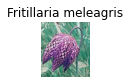

In [57]:
plt.figure(figsize=(N, 1))
plt.imshow(X_prediction, cmap="gray")  # greens, reds, blues, rgb
plt.title("{}".format(Predicted_flower))
plt.axis('off')
plt.show

Below is the code for building GUI using ktinter but since it doesnt work well with colab, I am uploading the screenshot of the outcome of the code execution here(GUI output.jpg)

In [58]:
import pandas as pd
import re
import tkinter as tk
from tkinter import ttk, Label
from PIL import Image, ImageTk

win=tk.Tk()
win.title('Flowers Classifier')

Name = ttk.Label(win,text="File Name")
Name.grid(row=0,column=0,sticky=tk.W)

Name_var=tk.StringVar()
Name_entrybox=ttk.Entry(win,width=16,textvariable=Name_var)
Name_entrybox.grid(row=0,column=1)

def Import_Data():
    global DB
    DF_Name = Name_var.get()
    print("Name obtained ", DF_Name)
    load = Image.open(DF_Name)
    render=ImageTk.PhotoImage(load)
    
    img = Label(image=render)
    img.image = render
    img.place(x=100,y=50)
    
    rerun_model = load_model('./drive/MyDrive/CNN_Project2/flowers.h5')
    X_prod_base = []
    
    X_prediction = cv2.imread(DF_Name)
    dummy_X_pred = cv2.resize(X_prediction, (128, 128))
    dummy_X_pred.shape
    X_prod_base.append(dummy_X_pred)
    X_prod = np.array(X_prod_base)
    X_prod.shape
    pred_output = rerun_model.predict(X_prod) 
    pred_output
    print(np.argmax(pred_output, axis = 1)[0])
    flower_names = {
        0:'Narcissus pseudonarcissus',
        1:'Galanthus nivalis',
        2:'Chamomile',
        3:'Dandelion',
        4:'Taraxacum officinale',
        5:'Primula veris',
        6:'Marsh Marigold',
        7:'Anemonoides nemorosa',
        8:'Pansy inspire deluxxe denim',
        9:'Convallaria majali',
        10:'Campanula',
        11:'Early Crocus',
        12:'Iris',
        13:'Lilium lancifolium',
        14:'Lilium',
        15:'Fritillaria meleagris',
        16:'Helianthus annuus'
    }
    Predicted_flower = flower_names[np.argmax(pred_output, axis = 1)[0]]
    
    y=Predicted_flower
    Pred = ttk.Label(win,text=y,font=("Arial", 25))
    Pred.place(x=335,y=570)



Import_Data_Button=ttk.Button(win, text="Predict", command= Import_Data)
Import_Data_Button.grid(row=0, column=2)

win.mainloop()

TclError: ignored

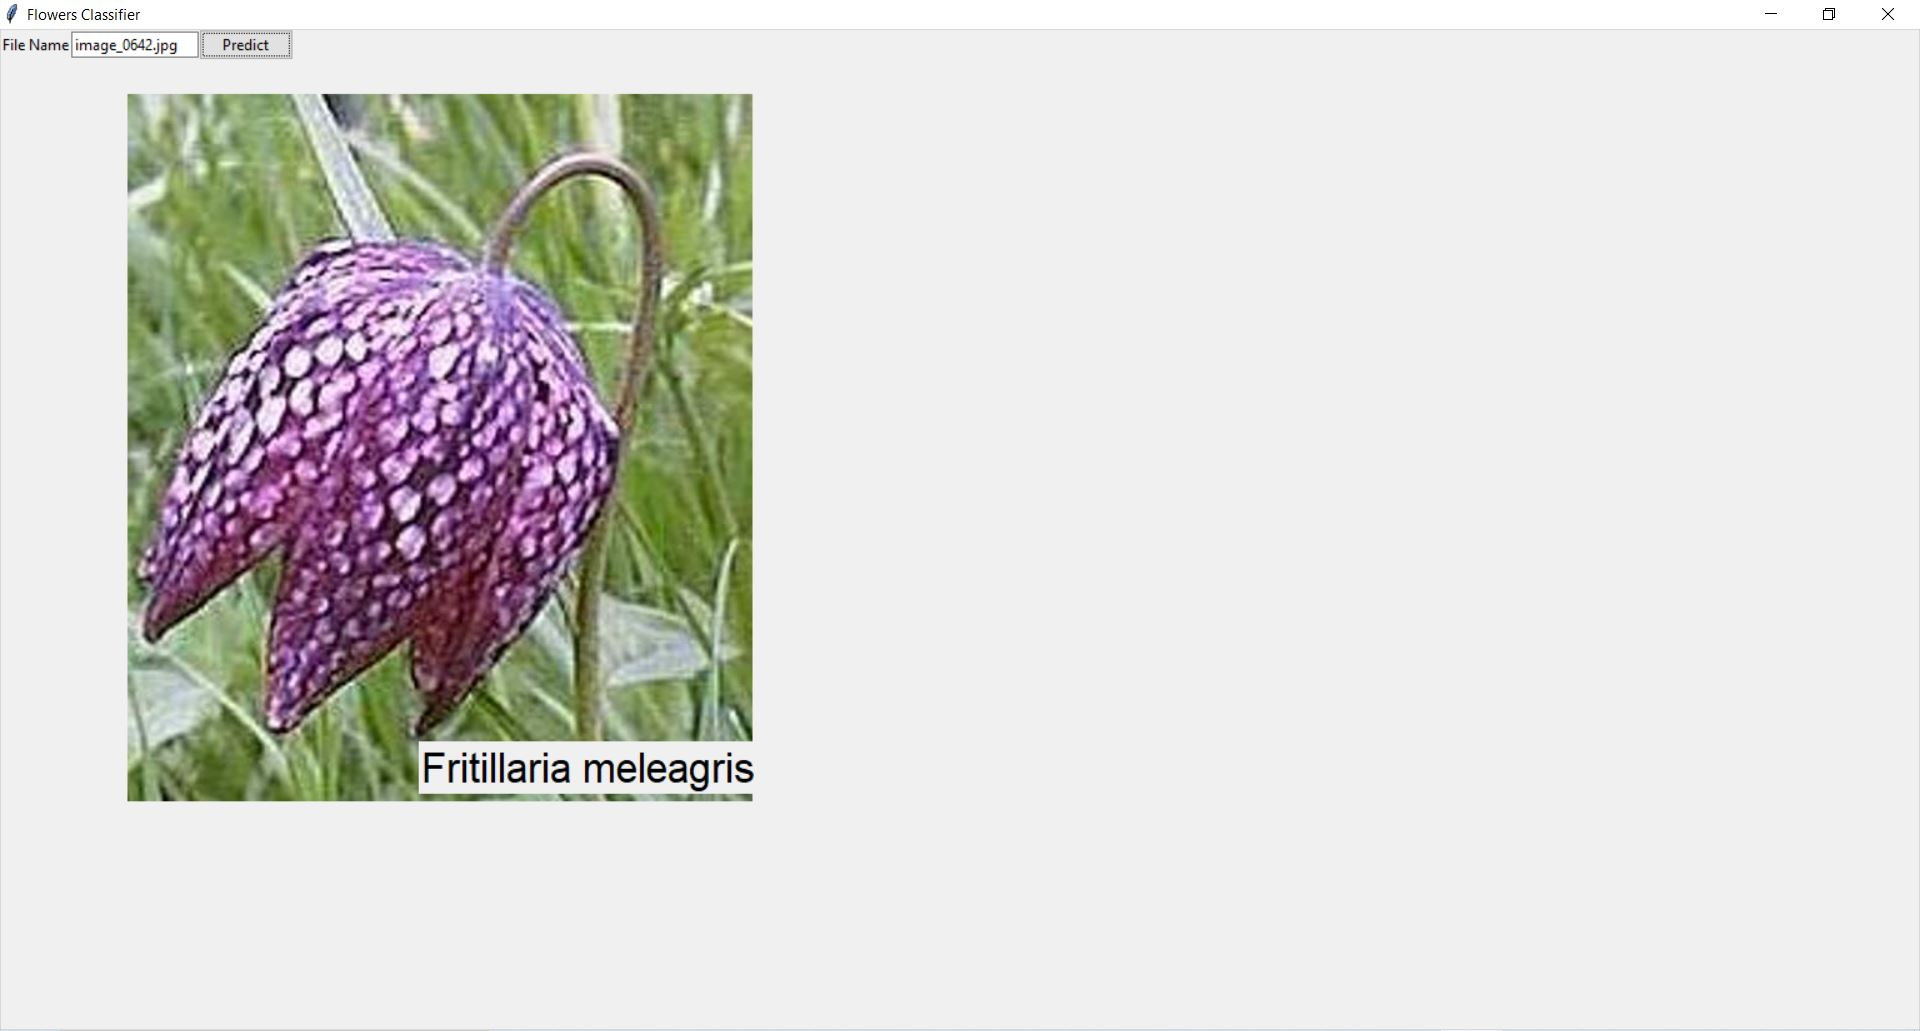

In [64]:
#Output screenshot
from IPython.display import Image
Image(filename='/content/drive/MyDrive/CNN_Project2/GUI output.JPG') 